In [3]:
import pandas as pd
import numpy as np       #载入必要的库
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data_phoenix = pd.read_csv('../dataset/Phoenix_new.csv', encoding='ISO-8859-1')
data_calgary = pd.read_csv('../dataset/Calgary_new.csv', encoding='ISO-8859-1')
data_newyork = pd.read_csv('../dataset/NewYork_new.csv', encoding='ISO-8859-1')
data_singapore= pd.read_csv('../dataset/Singapore_new.csv', encoding='ISO-8859-1')
print(data_phoenix.shape)
print(data_calgary.shape)
print(data_newyork.shape)
print(data_singapore.shape)
data_phoenix

(7247, 6)
(3013, 6)
(56252, 6)
(33712, 6)


,VenueId,Longitude,Dimension,Category,City,CountryCode
0,413ba880f964a520011c1fe3,33.494307,-112.059703,Rock Club,Phoenix,US
1,413ba880f964a5200c1c1fe3,33.429753,-111.944480,Bar,Phoenix,US
2,413ba880f964a5200e1b1fe3,33.509136,-112.029283,Resort,Phoenix,US
3,413ba880f964a520111c1fe3,33.641348,-112.117624,Pizza Place,Phoenix,US
4,413ba880f964a520131c1fe3,33.538693,-112.064192,Pizza Place,Phoenix,US
...,...,...,...,...,...,...
7242,52269e1b11d22a489e0dc3d7,33.495389,-112.021272,Coffee Shop,Phoenix,US
7243,5229387a11d2ae7da721757d,33.557019,-112.186848,Residential Building (Apartment / Condo),Phoenix,US
7244,522a02b1498e3faacde032ce,33.448889,-112.078332,Courthouse,Phoenix,US
7245,52348b3a11d21bede302d8ad,33.641171,-112.053730,Housing Development,Phoenix,US


In [12]:
data_phoenix = data_phoenix.drop(data_phoenix[data_phoenix['Category'] == 'Home (private)'].index)
data_calgary = data_calgary.drop(data_calgary[data_calgary['Category'] == 'Home (private)'].index)
data_newyork = data_newyork.drop(data_newyork[data_newyork['Category'] == 'Home (private)'].index)
data_singapore = data_singapore.drop(data_singapore[data_singapore['Category'] == 'Home (private)'].index)

In [13]:
data_phoenix_category = data_phoenix.groupby('Category').size().sort_values(ascending=False)
data_calgary_category = data_calgary.groupby('Category').size().sort_values(ascending=False)
data_newyork_category = data_newyork.groupby('Category').size().sort_values(ascending=False)
data_singapore_category = data_singapore.groupby('Category').size().sort_values(ascending=False)

#Top10
data_phoenix_category=data_phoenix_category[0:10]
data_calgary_category=data_calgary_category[0:10]
data_newyork_category=data_newyork_category[0:10]
data_singapore_category=data_singapore_category[0:10]

In [14]:
data= pd.DataFrame()
data = data.append(data_phoenix_category,ignore_index= True)
data = data.append(data_calgary_category,ignore_index= True)
data = data.append(data_newyork_category,ignore_index= True)
data = data.append(data_singapore_category,ignore_index= True)
data
data_phoenix_category

Category
Fast Food Restaurant                        232
Mexican Restaurant                          225
Office                                      221
Gas Station / Garage                        211
Building                                    192
Automotive Shop                             184
American Restaurant                         159
Pizza Place                                 136
Coffee Shop                                 136
Residential Building (Apartment / Condo)    133
dtype: int64

In [15]:
data=data.fillna(0)
data.astype(int)

,American Restaurant,Automotive Shop,Building,Coffee Shop,Fast Food Restaurant,Gas Station / Garage,Mexican Restaurant,Office,Pizza Place,Residential Building (Apartment / Condo),...,Pub,Bus Line,Deli / Bodega,Italian Restaurant,Salon / Barbershop,Asian Restaurant,Bus Station,Caf,Chinese Restaurant,College Classroom
0,159,184,192,136,232,211,225,221,136,133,...,0,0,0,0,0,0,0,0,0,0
1,0,0,61,159,59,70,0,74,53,0,...,61,0,0,0,0,0,0,0,0,0
2,0,0,1175,1007,0,0,0,2277,1129,1426,...,0,880,965,869,910,0,0,0,0,0
3,0,0,964,897,0,0,0,991,0,1483,...,0,579,0,0,0,799,1016,766,1035,657


In [16]:
data.index = pd.Series(['Phoenix', 'Calgary','NewYork','Singapore'])
data.to_csv("Distribution_Capare4City.csv",index=False,sep=',')
data

,American Restaurant,Automotive Shop,Building,Coffee Shop,Fast Food Restaurant,Gas Station / Garage,Mexican Restaurant,Office,Pizza Place,Residential Building (Apartment / Condo),...,Pub,Bus Line,Deli / Bodega,Italian Restaurant,Salon / Barbershop,Asian Restaurant,Bus Station,Caf,Chinese Restaurant,College Classroom
Phoenix,159.0,184.0,192.0,136.0,232.0,211.0,225.0,221.0,136.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Calgary,0.0,0.0,61.0,159.0,59.0,70.0,0.0,74.0,53.0,0.0,...,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NewYork,0.0,0.0,1175.0,1007.0,0.0,0.0,0.0,2277.0,1129.0,1426.0,...,0.0,880.0,965.0,869.0,910.0,0.0,0.0,0.0,0.0,0.0
Singapore,0.0,0.0,964.0,897.0,0.0,0.0,0.0,991.0,0.0,1483.0,...,0.0,579.0,0.0,0.0,0.0,799.0,1016.0,766.0,1035.0,657.0


In [17]:
data = data.stack().unstack(0)
data

,Phoenix,Calgary,NewYork,Singapore
American Restaurant,159.0,0.0,0.0,0.0
Automotive Shop,184.0,0.0,0.0,0.0
Building,192.0,61.0,1175.0,964.0
Coffee Shop,136.0,159.0,1007.0,897.0
Fast Food Restaurant,232.0,59.0,0.0,0.0
Gas Station / Garage,211.0,70.0,0.0,0.0
Mexican Restaurant,225.0,0.0,0.0,0.0
Office,221.0,74.0,2277.0,991.0
Pizza Place,136.0,53.0,1129.0,0.0
Residential Building (Apartment / Condo),133.0,0.0,1426.0,1483.0


In [18]:
data['Phoenix'] = data['Phoenix'].div(data_phoenix.shape[0])
data['Calgary'] = data['Calgary'].div(data_calgary.shape[0])
data['NewYork'] = data['NewYork'].div(data_newyork.shape[0])
data['Singapore'] = data['Singapore'].div(data_singapore.shape[0])
data

,Phoenix,Calgary,NewYork,Singapore
American Restaurant,0.023033,0.000000,0.000000,0.000000
Automotive Shop,0.026655,0.000000,0.000000,0.000000
Building,0.027814,0.020734,0.021699,0.031199
Coffee Shop,0.019702,0.054045,0.018596,0.029031
Fast Food Restaurant,0.033609,0.020054,0.000000,0.000000
Gas Station / Garage,0.030566,0.023793,0.000000,0.000000
Mexican Restaurant,0.032595,0.000000,0.000000,0.000000
Office,0.032015,0.025153,0.042050,0.032073
Pizza Place,0.019702,0.018015,0.020849,0.000000
Residential Building (Apartment / Condo),0.019267,0.000000,0.026334,0.047997


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


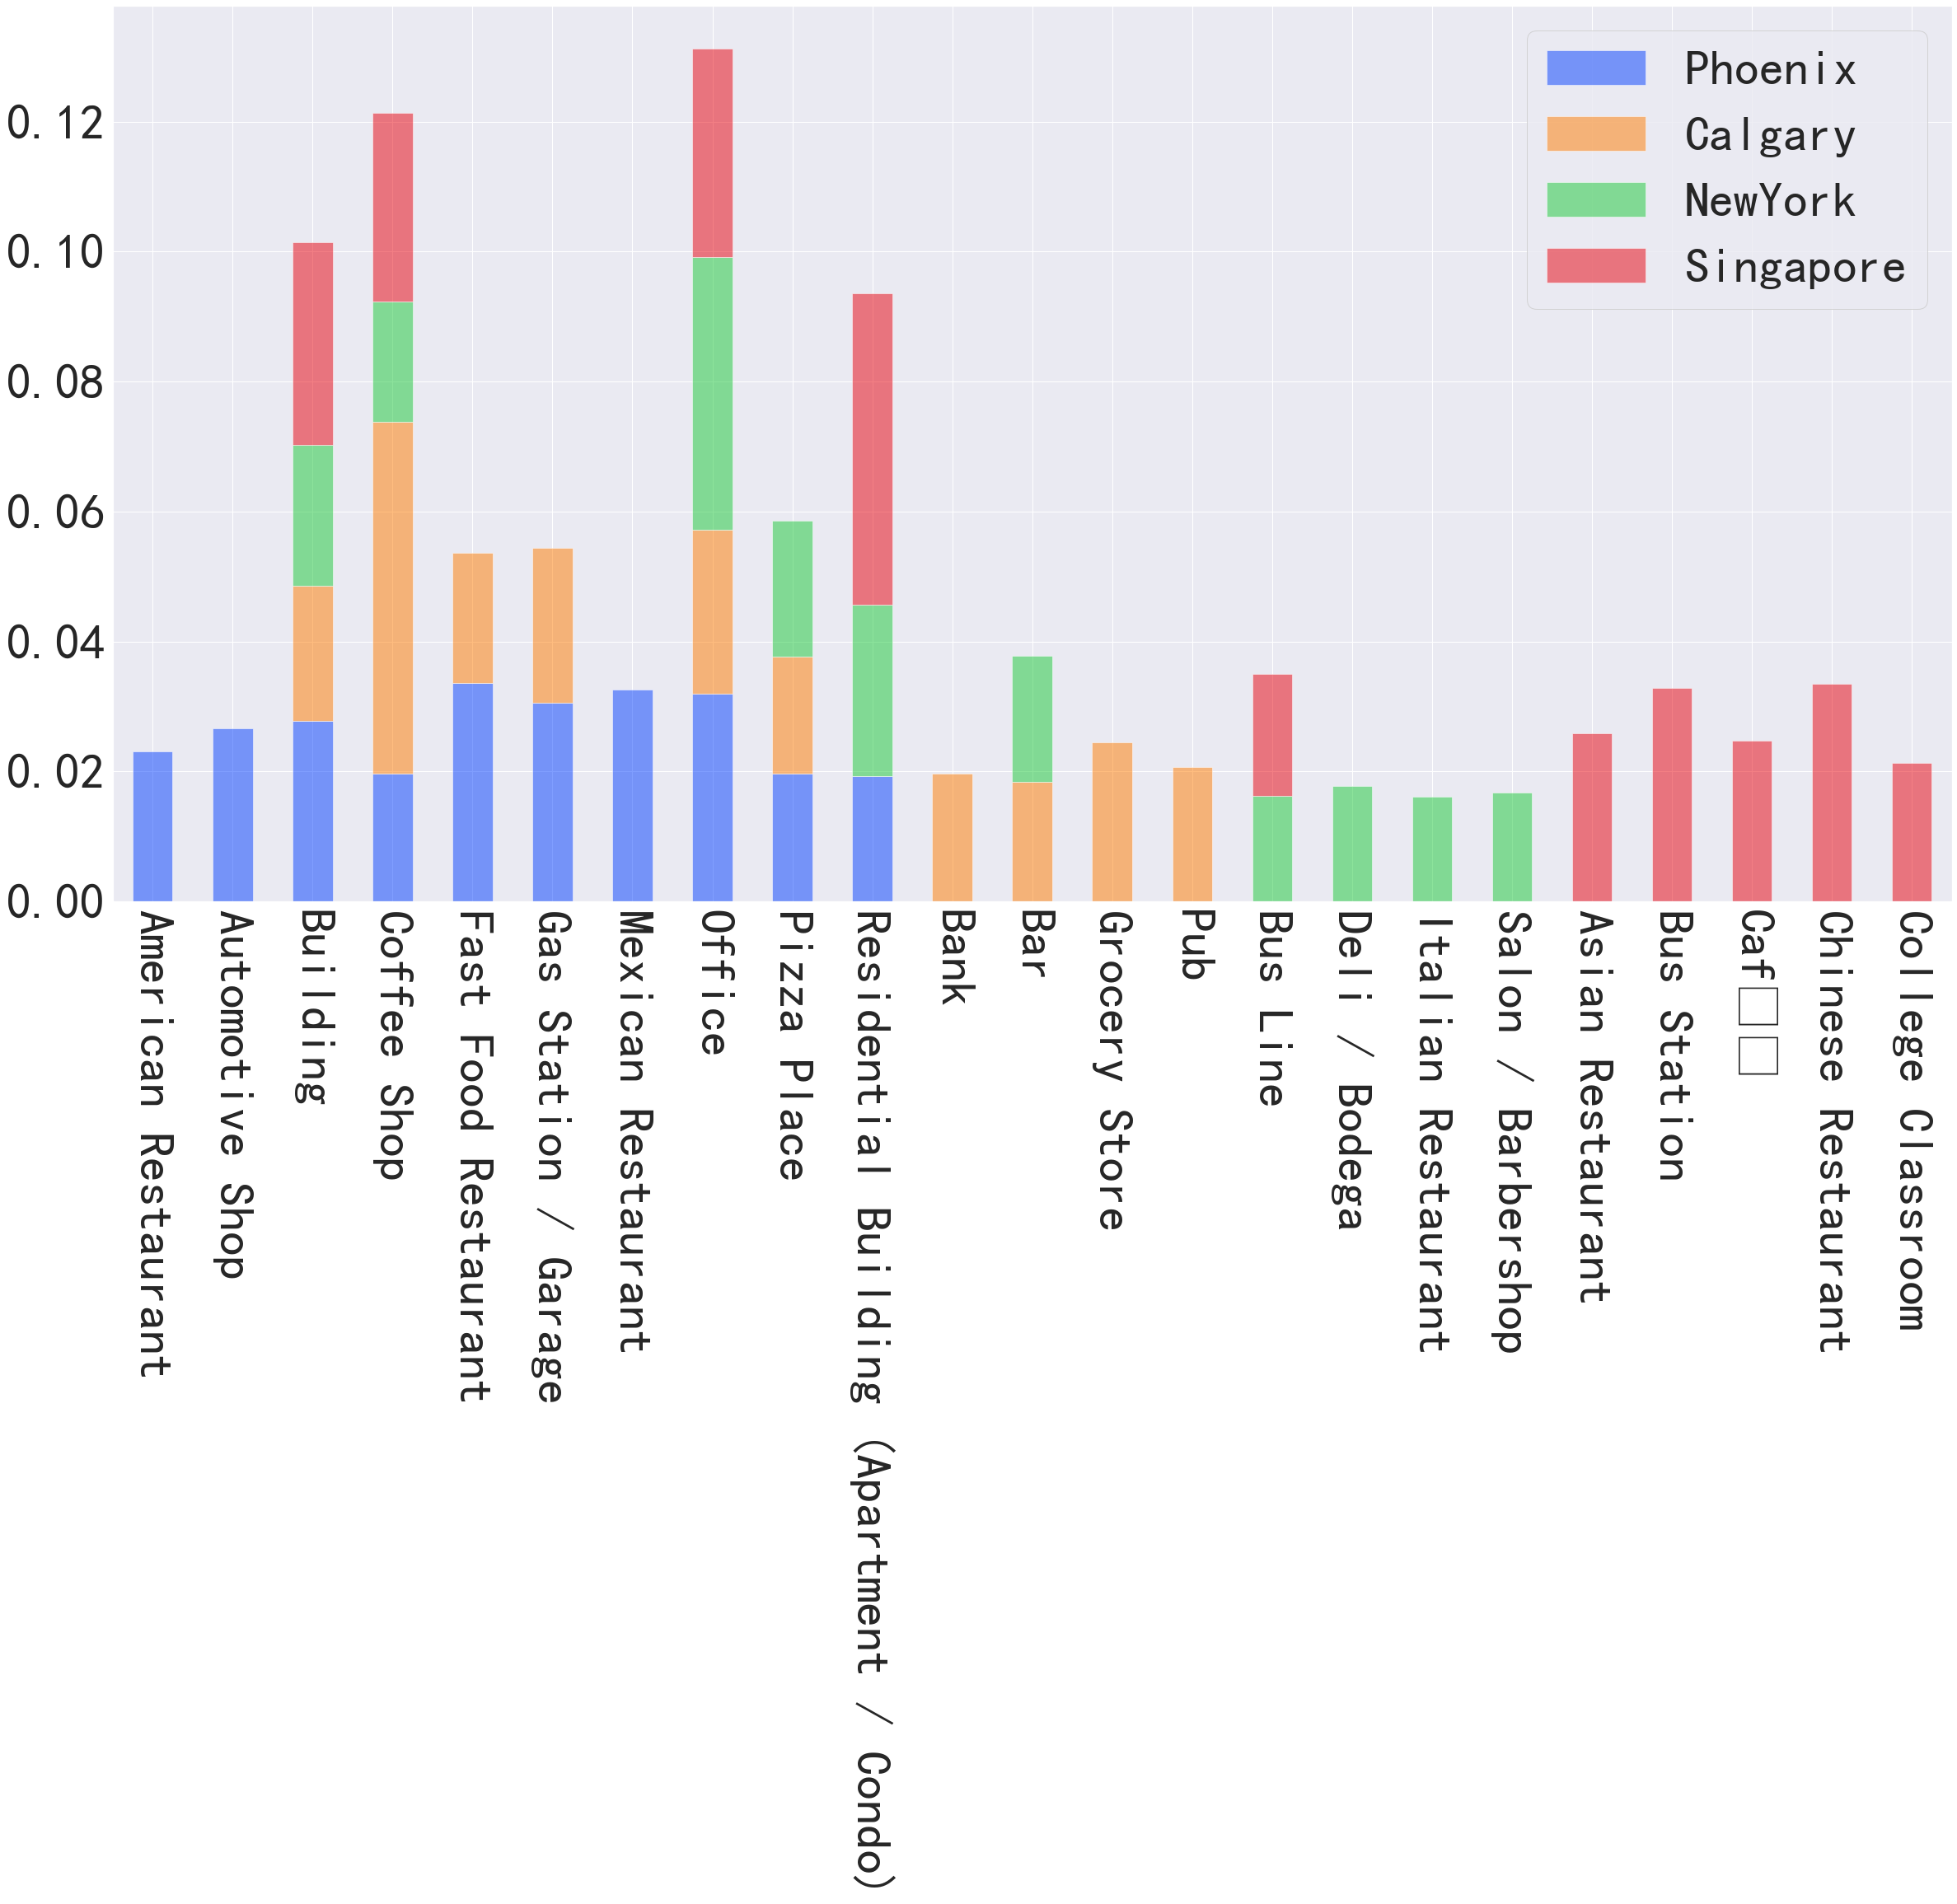

In [19]:
plt.rcParams['figure.figsize'] = (40, 20)   #调整图片大小

import seaborn as sns
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False      #显示负号

sns.set_palette(sns.color_palette('bright'))  #设置调色板
#pal_style = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']

data.plot.bar(stacked=True, alpha=0.5)      #绘制堆积柱状图

plt.xticks(fontsize=60, rotation=270)    #设置x和y轴刻度值的字体大小;rotation规定水平排列刻度文字。
plt.yticks(fontsize=60)    #设置y轴刻度值的字体大小

plt.legend(fontsize=60)    #设置legend刻度值的字体大小

#plt.yticks(np.arange(0, 251, 50)) #设置y轴标签
plt.show()